In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [25]:
root_path = os.path.join('..', '..', 'cleaned_logs_to_keep', 'databricks', 'Scala')
full_logs = pd.read_csv(os.path.join(root_path, 'scala_web_google_rdd_df.csv'))

In [26]:
def get_durations(df):
    
    try:
        df['end_of_command'] = pd.to_datetime(df['end_of_command'])
        df['duration'] = df['end_of_command'].diff().dt.total_seconds()
        df['duration'].fillna(0, inplace=True)
        df.set_index('loop_counter', inplace=True)
        df['edge_per_node'] = df['filename'].apply(lambda x: int(x.split('_')[-1].split('.')[0]))
    except:
        pass
    return df

In [27]:
rdd_logs = full_logs[full_logs['algo_type'] == 'scala-rdd-sorted']
df_logs = full_logs[full_logs['algo_type'] == 'scala-df']

rdd_logs = get_durations(rdd_logs)
df_logs = get_durations(df_logs)

In [28]:
print(f"duration of rdd version = {rdd_logs['duration'].sum()} seconds")
print(f"duration of df version = {df_logs['duration'].sum()} seconds")

duration of rdd version = 1164.194 seconds
duration of df version = 1245.516 seconds


In [29]:
rdd_logs

,filename,algo_type,command,end_of_command,accum,length,duration
loop_counter,,,,,,,
0,dbfs:/FileStore/web-Google.txt,scala-rdd-sorted,start,2021-03-25 16:12:50.476000+00:00,0,0,0.000
1,dbfs:/FileStore/web-Google.txt,scala-rdd-sorted,ded_reduce,2021-03-25 16:13:54.701000+00:00,8670951,3265665,64.225
2,dbfs:/FileStore/web-Google.txt,scala-rdd-sorted,ded_reduce,2021-03-25 16:14:56.104000+00:00,4821525,2137152,61.403
3,dbfs:/FileStore/web-Google.txt,scala-rdd-sorted,ded_reduce,2021-03-25 16:15:53.426000+00:00,3278772,2447178,57.322
4,dbfs:/FileStore/web-Google.txt,scala-rdd-sorted,ded_reduce,2021-03-25 16:23:11.339000+00:00,3888454,1805991,437.913
5,dbfs:/FileStore/web-Google.txt,scala-rdd-sorted,ded_reduce,2021-03-25 16:31:15.485000+00:00,1905323,916041,484.146
6,dbfs:/FileStore/web-Google.txt,scala-rdd-sorted,ded_reduce,2021-03-25 16:31:37.109000+00:00,86783,873626,21.624
7,dbfs:/FileStore/web-Google.txt,scala-rdd-sorted,ded_reduce,2021-03-25 16:31:55.614000+00:00,1318,872967,18.505
8,dbfs:/FileStore/web-Google.txt,scala-rdd-sorted,ded_reduce,2021-03-25 16:32:14.670000+00:00,0,872967,19.056


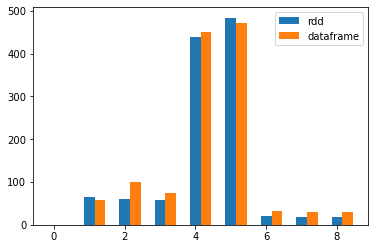

In [37]:
width = 0.3
plt.bar(rdd_logs.index.values, height=rdd_logs['duration'], width=width, label='rdd')
plt.bar(df_logs.index.values + width, height=df_logs['duration'], width=width, label='dataframe')
plt.legend()